In [76]:
import xlrd
import jieba
import pymysql
import matplotlib.pylab as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import jieba.posseg as psg

In [80]:
# 生成词云
def makeWordCloud(txt): 
    wc = WordCloud(background_color="white",
                    max_words=500,
                    repeat=True,
                    width=300, #修改尺寸
                    height=100,
                    scale=4, #这个数值越大，产生的图片分辨率越高，字迹越清晰
                    font_path="C:\Windows\Fonts\STXINGKA.TTF")
    wc.generate_from_frequencies(txt)
    wc.to_file('词云.png')
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()

In [78]:
# 文件路径
excel = r'C:\Users\Yongbin Cheng\Desktop\阳光\文化传媒产业20201126\20201127研报搜索结果研究报告（500）.xlsx'

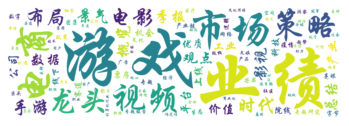

In [81]:
txt = ''
readbook = xlrd.open_workbook(excel)
sheet = readbook.sheet_by_index(0) #取第一个sheet页
rows = sheet.nrows
i = 0
while i < rows:
    txt += sheet.cell(i,4).value #取第5列的值
    i += 1
seg_list = [x.word for x in psg.cut(txt)] #分词后得到的列表
pos_dict = {x.word:x.flag for x in psg.cut(txt)} #词性的字典
c = Counter()
result = {}
for x in seg_list:
    if len(x) > 1 and x != '\r\n':
        c[x] += 1
for (k, v) in c.most_common():
    result[k] = v #放到字典中，用于生成词云的源数据
list_removed = ['互联网', '周报', '报告', '板块', '内容'] #要去掉的词语
list_keys = [key for key in result.keys()][2:] #去掉前2个最高频词语
result = {k:result[k] for k in list_keys if k not in list_removed and pos_dict[k]=='n'} #只留下名词
makeWordCloud(result)   